# Panda Vs Bear Classification

I'll start with basically mounting my google drive. It has many uses and is a great life saver for using with Colab. It can : 
* Be used  as a backup disk
* Be used as a temporary storage disk
* Be used as a medium to transfer files from PC to Colab

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'



Mounted at /content/gdrive


Then we will import some libraries and modules needed for performing operations

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

Setting up the "batch size".  It is the amount of images it can process at a given time
* Higher the batch size higher the memory usage faster the execution
* Lower the batch size lower the memory usage slower the execution
Need to find the perfect sweet spot. 

In [0]:
bs = 64

I will be using the [google_images_download module](https://github.com/hardikvasa/google-images-download) to download images and form a dataset. Remember we are just doing this for learning purposes. The images may contain copyright material and hence is not recommended for commercial purposes.

In [0]:
!pip install google_images_download

I have written a script for easy downloading of large amounts of images. google_images_download only allows 100 images to be downloaded without using chromedriver and selenium. To overcome this problem i wrote a script which is inspired from [this](https://forums.fast.ai/t/tips-for-building-large-image-datasets/26688). I wrote the script in Windows and hence it required to convert its line endings etc to the unix format (Google for utf-8 in unix vs dos). For this the tool dos2unix has been used. (Explicitly needs to be installed!)

In [0]:
!cp gdrive/'My Drive'/fastai-v3/a.sh /content && dos2unix a.sh

dos2unix: converting file a.sh to Unix format...


So basically what my script does is, it accepts 4 parameter :-
1. Image to be searched 
2. The limit of files to download (MAX is 100)
3. The number of times you want to carry out this script
4. The folder name you want to save the data in 

The script downloads the images in folder named downloaded/train{your-folder-name}

(Please pardon my bash scripting. I am new to it!)

In [0]:
!cat a.sh

#!/bin/bash
for ((i=1;i<=$3;i++))
do
googleimagesdownload -k "$1" -s medium -wr '{"time_min":"0'$i'/01/2018","time_max":"0'$i'/30/2018"}' -l "$2" -o /content/downloaded -i train/$4
done

First we download the images of Panda.

In [0]:
!bash a.sh "panda" "90" "10" "Panda" 


Item no.: 1 --> Item name = panda
Evaluating...
Starting Download...
Completed Image ====> 1. panda-beauval-130118.jpeg
Completed Image ====> 2. _91026629_gettyimages-519508400.jpg
Completed Image ====> 3. _89870265_89870264.jpg
Completed Image ====> 4. 725-trtworld-92904-122089.jpg
Completed Image ====> 5. _91022912_mediaitem91022911.jpg
Completed Image ====> 6. 2747-trtworld-180613-214122.jpg
Completed Image ====> 7. 86550d67399c902bafeebc4495c255ef.jpg
Completed Image ====> 8. f85fef545a6b21f8b752c44c78012a66.png
Completed Image ====> 9. zooofficials.jpg
Completed Image ====> 10. p05tsfrn.jpg
Completed Image ====> 11. 1060761993.jpg
Completed Image ====> 12. dims?quality=80&thumbnail=1200%2C630&image_uri=https%3A%2F%2Fo.aolcdn.com%2Fimages%2Fdims3%2FGLOB%2Flegacy_thumbnail%2F1200x630%2Fformat%2Fjpg%2Fquality%2F85%2Fhttp%253A%252F%252Fi.huffpost.com%252Fgen%252F4665102%252Fimages%252Fn-PANDA-628x314.jpg&client=cbc79c14efcebee57402&signature=8b959b5fb95c28fe17e5a834fd1c110d9b5a28a8.j

Lets check the actual number of image files it downloaded.

In [0]:
!ls /content/downloaded/train/Panda -1 | wc -l && echo "Files in folder"

723
Files in folder


Similarly we do the same with Bear images dataset

In [0]:
!bash a.sh "bear" "90" "10" "Bear"


Item no.: 1 --> Item name = bear
Evaluating...
Starting Download...
Completed Image ====> 1. oxeh9t5oaitj8dxus93g.jpg
Completed Image ====> 2. d2239e09-fa89-46d4-9c97-6701f35e91f4-large16x9_Grizzly_Logo.jpg
Completed Image ====> 3. https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F656313571%2F960x0.jpg%3Ffit%3Dscale.jpg
Completed Image ====> 4. 250-0457247af5f8bf9499898c5ccac45f81_alaska-bears-40.jpg
Completed Image ====> 5. Pl_os_golut_viatge_finlandia.jpg
Completed Image ====> 6. uxCHVPWHe3ZppdzoG9xxxNui4fJcUO-Zb_6m9znzDvu4KBFWhd2elbEVLf9EDkFV8Q.jpg
Completed Image ====> 7. 5a4cd26f396e3742068b4743-750-482.jpg
Completed Image ====> 8. _99180007_mediaitem99180006.jpg
Completed Image ====> 9. Brown-Bear-Snarl-2-900x741.jpg
Completed Image ====> 10. 2AD2BCE3-1DD8-B71C-07AA52E8E06D4D62HiResProxy.jpg
Completed Image ====> 11. polar_bear_adf.jpg
Completed Image ====> 12. information_items_7325.jpg
Completed Image ====> 13. Bear1-nr88r9rka5bf5jmuqvdigj980xavqytvxhg3w8gzfa.jpg
Comp

Now the problem with our dataset is, we need to clean it! First we will need to make sure the downloaded files are image extension or not. Also for ease and compatibility, I will only be using "jpeg/jpg" files. All other files will be deleted from the folder. We need to do this with both our "Panda" dataset and "Bear" dataset.

In [0]:
!find downloaded/train/Bear -type f ! \( -iname '*.jpeg' -o -iname '*jpg' \) -delete

In [0]:
!find downloaded/train/Panda -type f ! \( -iname '*.jpeg' -o -iname '*jpg' \) -delete

Now that we have only "jpeg" and "jpg" image extension files, let us make this extension same for ease. (jpeg and jpg are almost similar with few minor differences, hence can be used interchangeably). I will rename all the files to ".jpg". Also the file names have special character, blank spaces, etc! Sometimes we get errors because of illegal file names. So for the sake of ease and compatibility, we will name the images numerically, starting from 1 upto N.

In [0]:
cd /content/downloaded/train/Panda

/content/downloaded/train/Panda


In [0]:
!ls -v | cat -n | while read n f; do mv -n "$f" "$n.jpg"; done

In [0]:
!ls -la | head -n 10 

total 71208
drwxr-xr-x 2 root root   69632 Apr 29 18:53 .
drwxr-xr-x 4 root root    4096 Apr 29 17:54 ..
-rw-r--r-- 1 root root   74134 Apr 29 17:48 100.jpg
-rw-r--r-- 1 root root   89097 Apr 29 17:43 101.jpg
-rw-r--r-- 1 root root   52664 Apr 29 17:44 102.jpg
-rw-r--r-- 1 root root   46165 Apr 29 17:44 103.jpg
-rw-r--r-- 1 root root   80686 Apr 29 17:50 104.jpg
-rw-r--r-- 1 root root   82398 Apr 29 17:47 105.jpg
-rw-r--r-- 1 root root   81882 Apr 29 17:49 106.jpg


In [0]:
cd /content/downloaded/train/Bear

/content/downloaded/train/Bear


In [0]:
!ls -v | cat -n | while read n f; do mv -n "$f" "$n.jpg"; done

In [0]:
!ls -la | head -n 10 

total 89980
drwxr-xr-x 2 root root   65536 Apr 29 18:55 .
drwxr-xr-x 4 root root    4096 Apr 29 17:54 ..
-rw-r--r-- 1 root root   30142 Apr 29 17:59 100.jpg
-rw-r--r-- 1 root root   44127 Apr 29 18:00 101.jpg
-rw-r--r-- 1 root root   82857 Apr 29 17:59 102.jpg
-rw-r--r-- 1 root root  294810 Apr 29 17:54 103.jpg
-rw-r--r-- 1 root root   84868 Apr 29 17:56 104.jpg
-rw-r--r-- 1 root root  195449 Apr 29 17:58 105.jpg
-rw-r--r-- 1 root root   97537 Apr 29 17:58 106.jpg


Now that we have partially clean dataset (I'll let you know why *partially clean* later), let us make a validaton set. According to [fastai documentation](https://docs.fast.ai/vision.data.html#ImageDataBunch.from_folder), every dataset should have a "train"(training set) folder and "valid"(validation set) folder. And in both of these folder the name of the classes should be the folder name. (In our case the subfolders will be *"Panda"* and *"Bear"*). So now lets create a "valid" folder and move few images from the training dataset to validation dataset. (Remember you have to do this step prior to training the model, as this can lead to unwanted bias!). I will be moving 90 images from the training dataset!

In [0]:
!mkdir /content/downloaded/valid && mkdir /content/downloaded/valid/Panda && mkdir /content/downloaded/valid/Bear

In [0]:
!find . -name '*.jpg' | head -n 90 | xargs -I {} mv {} /content/downloaded/valid/Panda/

In [0]:
!ls /content/downloaded/valid/Panda/ -1 | wc -l

90


In [0]:
!find /content/downloaded/train/Bear -name '*.jpg' | head -n 90 | xargs -I {} mv {} /content/downloaded/valid/Bear/

In [0]:
!ls /content/downloaded/valid/Bear/ -1 | wc -l

90


Now here comes the fun part , the training part! Let us define a path variable that will point to our dataset. **Remember** this path should have the **"train"** as well as **"valid"** folders. 

In [0]:
path = "/content/downloaded/"

Now we create an object of [**ImageDataBunch**](https://docs.fast.ai/vision.data.html#ImageDataBunch). We have to pass it the :- 
* path of our dataset
* transformation 
* size of images we want to work on
* batch size 

Also we normalize this data using the ImageNet stats (I still dont understand what it does except that it normalizes the rgb values of individual pixels of every image).

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

We check if we get the right class name and image

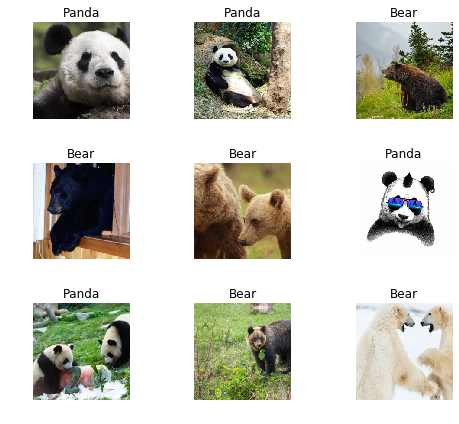

In [0]:
data.show_batch(rows=3, figsize=(7,6))

We print the total classes and the class names that our ImageDataBunch object has recognized.

In [0]:
print(data.classes)
len(data.classes),data.c

['Bear', 'Panda']


(2, 2)

We choose our learner model and pass it our ImageDataBunch object. **resnet34** has been used because it uses less memory, is faster and is pre-trained on *ImageNet Dataset*. 34 here indicates it has 34 layers in it. The output i.e our classes (bear/panda) are the last layer weights. We check the metrics in the form of error_rate. We could also use *"accuracy"*

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

It has been found out that fit_one_cycle() is much more efficient than using just fit(). Check out the paper linked in the fastai blogs for further info. We pass this function the number of cycles we want the model to learn from.

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.304470,0.028406,0.011111,00:39
1,0.166261,0.017362,0.005556,00:38
2,0.110988,0.012397,0.005556,00:40
3,0.076026,0.010442,0.005556,00:38


Yaaayyyy!! An error rate of only 0.005 percent! (which is obvious as the classifier only works on 2 classes xD ). If we are happy with the results then we save this model.

In [0]:
learn.save("stage-1")

Now lets create an Interpretation object to understand where our model failed for that 0.005 % 

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

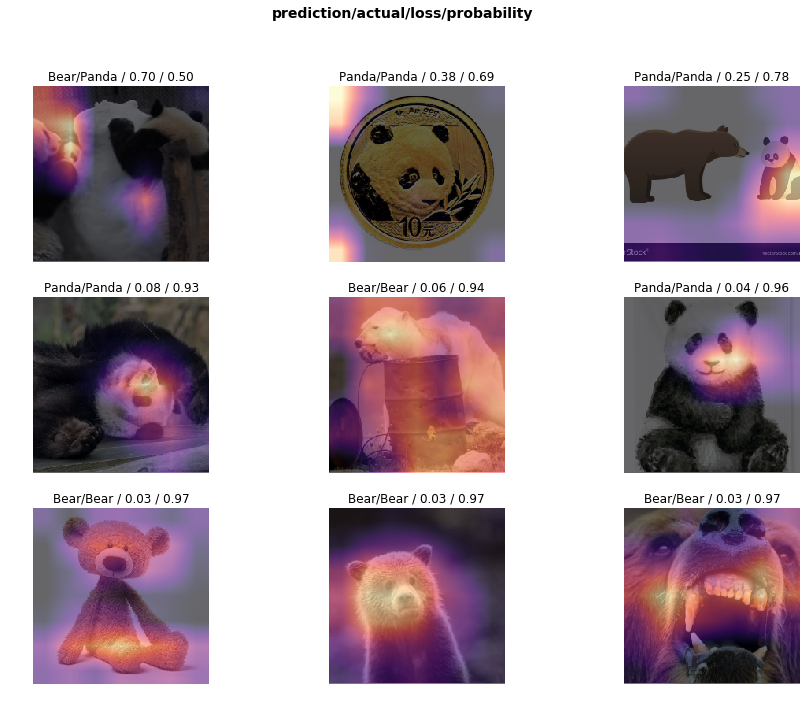

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

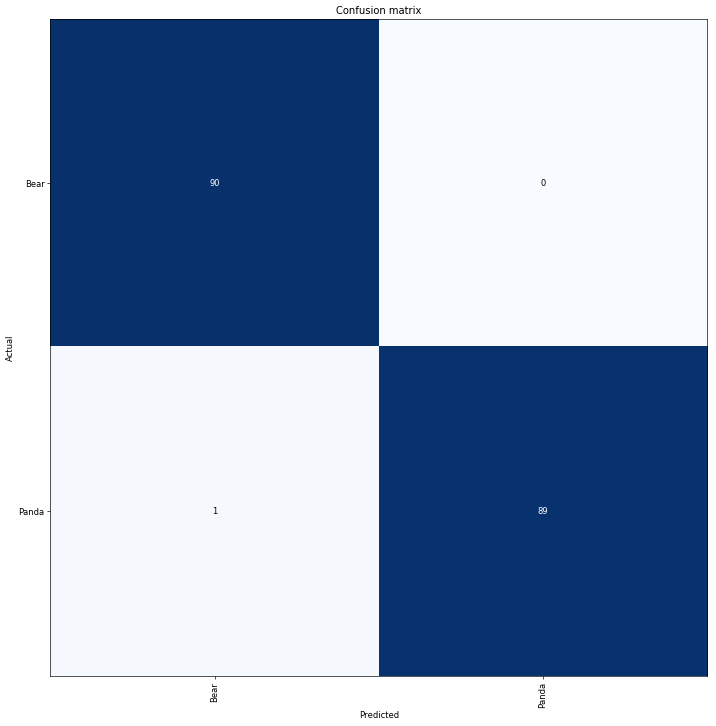

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
!cp -R /content/downloaded/* /content/gdrive/'My Drive'/fastai-v3/pandavbear/

In [0]:
!rm "/content/downloaded/train/Bear/692.jpg"

In [0]:
!cp /content/gdrive/'My Drive'/fastai-v3/del_unwanted.py /content/

In [0]:
!python /content/del_unwanted.py "/content/downloaded/train/Panda"

FILE:  692.jpg is corrupt!
FILE:  94.jpg is corrupt!
FILE:  315.jpg is corrupt!
FILE:  213.jpg is corrupt!
FILE:  382.jpg is corrupt!
Successfully Completed Operation! Files Courrupted are  5


In [0]:
!ls /content/gdrive/'My Drive'/fastai-v3/pandavbear/train/Bear -1 | wc -l

745
